# Generating Data

The purpose is to generate CSV data files for use. 

## Loading the Modules

In [48]:
# Load library
import numpy as np
import pandas as pd

# For plotting the data
import matplotlib.pyplot as plt

## Configure Globals

In [49]:
# Number of data points 
N = 20

# Max time value
time_max = 10

# Output CSV file
output_csv = "input_data.csv"

## Creating The Time Column

The first column signifies the time of the signals

In [50]:

# num : int, optional - Number of samples to generate. Default is 50. Must be non-negative.
# endpoint : bool - If True, stop is the last sample. Otherwise, it is not included. Default is True.
time = np.linspace(0, time_max, N, endpoint=False)

index = np.arange(N)


time
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## Plot the Column

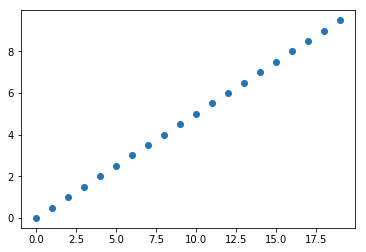

In [51]:
plt.plot(time, 'o')
plt.show()

## Data Columns

In [52]:
cos_data, sin_data = np.cos(time), np.sin(time)

## Plot the Data

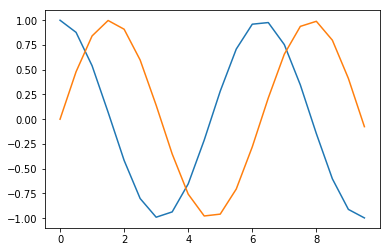

In [53]:
plt.plot(time, cos_data)
plt.plot(time, sin_data)

plt.show()

## Adding Simple Data Columns

In [54]:
binary = (np.where(time>4.5,1,0)) 
binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Self Defined Arrays

In [55]:
pa = np.array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
qa = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

pb = np.array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
qb = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

## Stack the Arrays

In [56]:
# Arrays to stack
data_arrays = ['Time', 
               'index',
               'cos_data', 
               'sin_data',
                'binary',
                'pa',
               'qa',
               'pb',
               'qb'
              ]

In [57]:
data_matrix = np.stack((time, index, cos_data, sin_data, binary, pa, qa, pb, qb), axis=1)

# print the data
data_matrix

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5       ,  1.        ,  0.87758256,  0.47942554,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  2.        ,  0.54030231,  0.84147098,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [ 1.5       ,  3.        ,  0.0707372 ,  0.99749499,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [ 2.        ,  4.        , -0.41614684,  0.90929743,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.5       ,  5.        , -0.80114362,  0.59847214,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 3.        ,  6.        , -0.9899925 ,  0.14112001,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 3.5       ,  7.        , -0.93645669, -0.35078323,  0

In [58]:
# Get the shape of the data
data_matrix.shape

(20, 9)

## Convert Numpy matrix to CSV

In [59]:
# Convert to pandas dataframe and save to CSV
pd.DataFrame(data_matrix).to_csv(output_csv, 
                                 sep=",",
                                 header=data_arrays, 
                                 index=False)

# Sanit Checks

In [60]:
df = pd.read_csv(output_csv, sep=',', usecols=["Time", "binary"])
df

,Time,binary
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,1.5,0.0
4,2.0,0.0
5,2.5,0.0
6,3.0,0.0
7,3.5,0.0
8,4.0,0.0
9,4.5,0.0


## Selecting Values from DataFrame

### 1) Check value of ```binary``` where ```Time``` is a specific value

https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe

In [61]:
bin_val = df.loc[df['Time'] == 5.5, 'binary'].iloc[0]
bin_val

1.0

### 2) Set value based at ```Time``` index

https://stackoverflow.com/questions/19226488/change-one-value-based-on-another-value-in-pandas

In [62]:
df.loc[df['Time'] == 9.0, 'binary'] = 2
# df[ (df['Time'] == 9.0) ]['binary'] = 2
df

,Time,binary
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,1.5,0.0
4,2.0,0.0
5,2.5,0.0
6,3.0,0.0
7,3.5,0.0
8,4.0,0.0
9,4.5,0.0


In [63]:
### 3) Set values based on ```Time``` range

In [64]:
df.loc[(df['Time'] > 7.0) & (df['Time'] < 10.0), 'binary'] = 2
df

,Time,binary
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,1.5,0.0
4,2.0,0.0
5,2.5,0.0
6,3.0,0.0
7,3.5,0.0
8,4.0,0.0
9,4.5,0.0


### 4) Time indexes between a certain range as a list

https://stackoverflow.com/questions/23748995/pandas-dataframe-to-list

In [65]:
time_list = df.loc[(df['Time'] >= 3.5) & (df['Time'] <= 7.5), 'Time'].values.tolist()
time_list

[3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]

### 5) Get subset of list till the range

In [66]:
subset_list = [i for i in time_list if i >= 5]
subset_list

[5.0, 5.5, 6.0, 6.5, 7.0, 7.5]

In [67]:
t=4.5
if(df.loc[df['Time'] == t, 'binary'].iloc[0] == 1):
    a=5